In this guided project, we do a short analysis of a Star Wars survey conducted by 538

In [101]:
import pandas as pd
import numpy as np
sw = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
sw.head(3)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [102]:
yes_no = {"Yes":True, "No":False}
cols = ['Have you seen any of the 6 films in the Star Wars franchise?','Do you consider yourself to be a fan of the Star Wars film franchise?']
sw[cols[0]] = sw[cols[0]].map(yes_no)
sw[cols[1]] = sw[cols[1]].map(yes_no)

In [103]:
for i in range(6):
    sw[sw.columns[i+3]] = sw[sw.columns[i+3]].replace(['S.a'],True,regex=True)
    sw[sw.columns[i+3]] = sw[sw.columns[i+3]].fillna(False)

In [104]:
sw.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
                 'Unnamed: 4':'seen_2','Unnamed: 5':'seen_3','Unnamed: 6':'seen_4',
                  'Unnamed: 7':'seen_5','Unnamed: 8':'seen_6',},inplace=True)

In [105]:
sw[sw.columns[3]] = sw[sw.columns[3]].replace(['S.a'],True,regex=True)
sw[sw.columns[3]] = sw[sw.columns[3]].fillna(False)

In [106]:
sw[sw.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


Changed the column names for variables regarding whether participant has seen star wars movie#n. Also changed the response variable to be T/F

In [107]:
sw[sw.columns[9:15]] = sw[sw.columns[9:15]].astype(float)

In [108]:
sw.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
                 'Unnamed: 10':'ranking_2','Unnamed: 11':'ranking_3',
                   'Unnamed: 12':'ranking_4','Unnamed: 13':'ranking_5',
                   'Unnamed: 14':'ranking_6',},inplace=True)

In [109]:
sw[sw.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

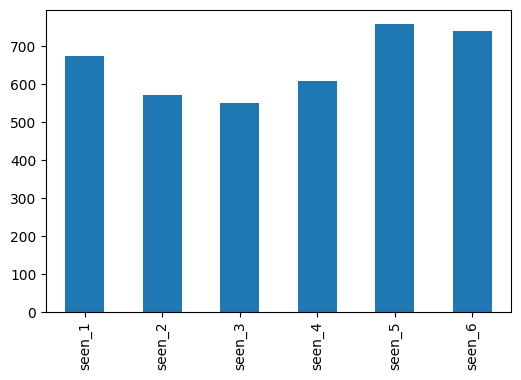

In [113]:
%matplotlib inline
sw[sw.columns[3:9]].sum().plot.bar()

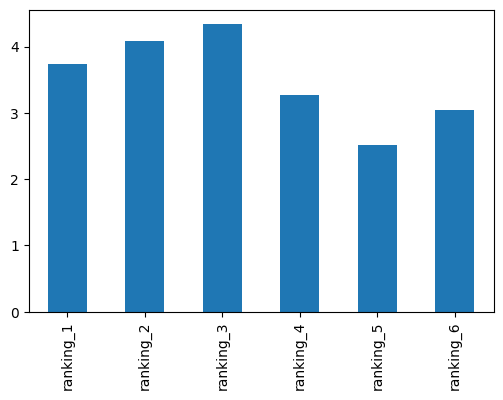

In [114]:
sw[sw.columns[9:15]].mean().plot.bar()

In [118]:
fan = sw[sw['Do you consider yourself to be a fan of the Star Wars film franchise?']==True]
notfan = sw[sw['Do you consider yourself to be a fan of the Star Wars film franchise?']==False]

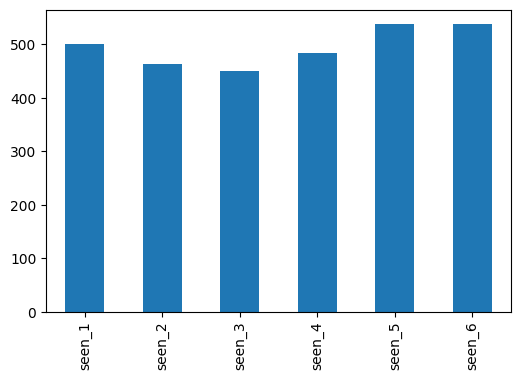

In [119]:
fan[fan.columns[3:9]].sum().plot.bar()

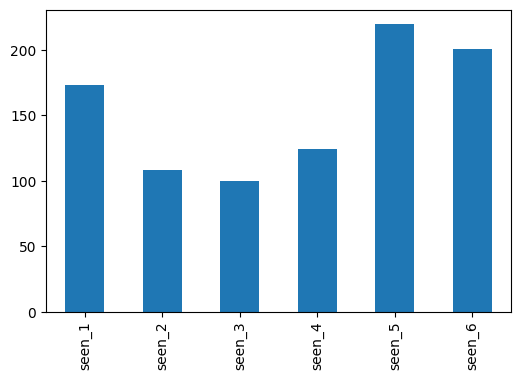

In [123]:
notfan[notfan.columns[3:9]].sum().plot.bar()

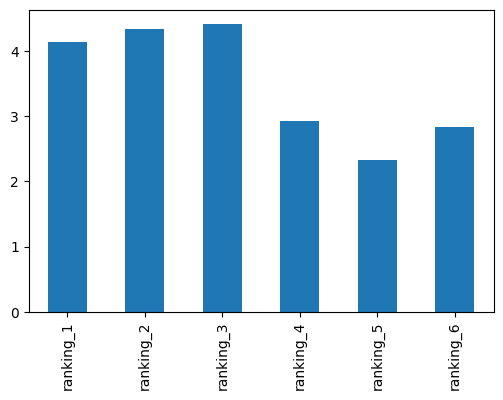

In [125]:
fan[fan.columns[9:15]].mean().plot.bar()

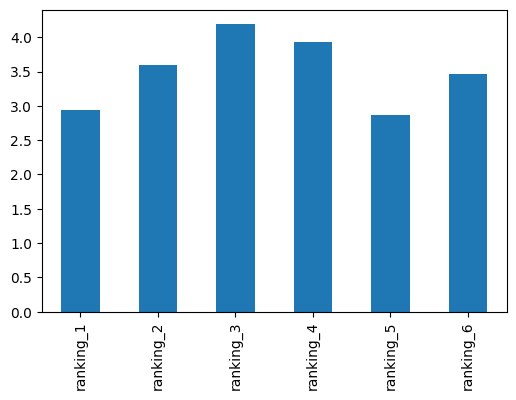

In [126]:
notfan[notfan.columns[9:15]].mean().plot.bar()